In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import tensorflow as tensor
from sklearn.feature_extraction.text import TfidfVectorizer

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [3]:
dataset = pd.read_csv(r'cleanedArticles.csv')

In [3]:
article = dataset.iloc[:,9]
topic = dataset.iloc[:,3]

In [4]:
dataset["publication"].value_counts()

Breitbart              23781
New York Post          17493
NPR                    11992
CNN                    11488
Washington Post        11114
Reuters                10710
Guardian                8681
New York Times          7803
Atlantic                7179
Business Insider        6757
National Review         6203
Talking Points Memo     5214
Vox                     4947
Buzzfeed News           4854
Fox News                4354
Name: publication, dtype: int64

In [402]:
dftwo = pd.concat([dataset[dataset["publication"] == "Breitbart"],dataset[dataset["publication"] == "New York Times"]])

In [403]:
article_two = dftwo.iloc[:,9]
topic_two = dftwo.iloc[:,3]

In [404]:
from sklearn.preprocessing import LabelEncoder
labelEncoder=LabelEncoder()
topic_two=labelEncoder.fit_transform(topic_two)

In [405]:
from sklearn.decomposition import TruncatedSVD

In [406]:
from sklearn.feature_extraction.text import CountVectorizer

In [407]:
vectorizer=CountVectorizer(max_df=1000, min_df=10, binary=True)
X_count=vectorizer.fit_transform(article_two)

In [408]:
X_count.size

3255733

In [409]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

In [410]:
svd = TruncatedSVD()
lsa=make_pipeline(svd, Normalizer(copy=False))

In [411]:
svd_count=lsa.fit_transform(X_count)

In [412]:
import matplotlib.pyplot as plt
import matplotlib.colors

In [413]:
colors=["red", "gold", "limegreen"]
cmap = matplotlib.colors.ListedColormap(colors)

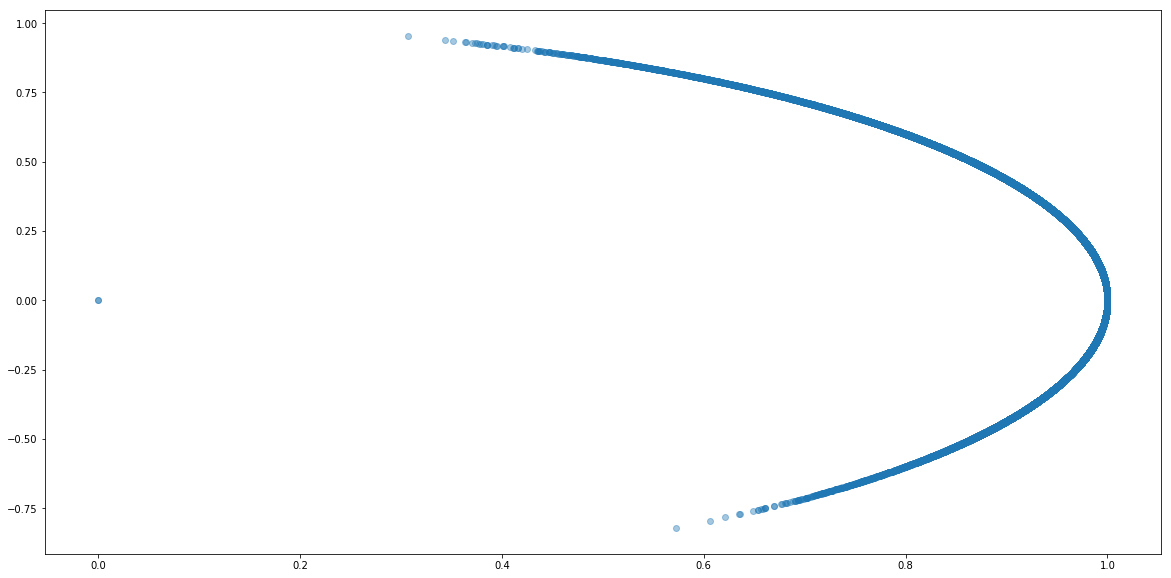

In [414]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.scatter(svd_count[:,0], svd_count[:,1], cmap=cmap, alpha = 0.4)
plt.show()

In [415]:
from sklearn.model_selection import StratifiedKFold

In [416]:
from sklearn.metrics import f1_score

In [420]:
clf = KNeighborsClassifier(n_neighbors=1)
#clf = RandomForestClassifier()
#clf=MultinomialNB(alpha=0.001)
skf = StratifiedKFold(n_splits=3)
for train_index, test_index in skf.split(svd_count, topic_two):
    X_train, X_test = svd_count[train_index], svd_count[test_index]
    y_train, y_test = topic_two[train_index], topic_two[test_index]
    clf.fit(X_train, y_train)
    print (f1_score(clf.predict(X_test), y_test,average='macro'))

0.553559209358
0.570180136366
0.572208148577
